In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
df = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,1/6/13 9:00,1/6/13 12:30,210,6,1,2013,9.0
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,1/6/13 17:00,1/6/13 23:00,360,6,1,2013,17.0
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/7/13 17:30,1/7/13 18:25,55,0,1,2013,17.5
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 17:30,1/9/13 18:25,55,2,1,2013,17.5
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 19:00,1/9/13 20:15,75,2,1,2013,19.0


In [4]:
#We do not need the full date time objects
df = df.drop(columns=['BeginTimeDate', 'EndTimeDate'])
# Convert categorical variables using factorize
cols = ['Facility Class', 'Facility Location', 'Facility Code', 'Facility', 'Status', 'Reservation Type']
df[cols] = df[cols].apply(lambda x: pd.factorize(x)[0])

In [5]:
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,Duration Minutes,Weekday,Month,Year,BeginTime
0,0,0,0,0,0,0,100.000000,210,6,1,2013,9.0
1,1,0,1,1,0,0,100.000000,360,6,1,2013,17.0
2,1,0,1,1,0,1,36.387374,55,0,1,2013,17.5
3,1,0,1,1,0,1,36.387374,55,2,1,2013,17.5
4,1,0,1,1,0,1,36.387374,75,2,1,2013,19.0


In [6]:
x=df.iloc[:, df.columns != 'Facility Class']  #Independent variable
y=df.iloc[:, df.columns == 'Facility Class']   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
f_score

(array([3.50826009e+04, 3.78961697e+05, 3.92562466e+05, 1.18267587e+04,
        1.79440547e+04, 3.20734397e+05, 3.58630106e+06, 6.90152087e+03,
        4.28678443e+02, 1.71599084e+01, 4.61850366e+03]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.41204070e-82, 3.09395312e-01, 0.00000000e+00]))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Facility Location'),
  Text(1, 0, 'Facility Code'),
  Text(2, 0, 'Facility'),
  Text(3, 0, 'Status'),
  Text(4, 0, 'Reservation Type'),
  Text(5, 0, 'Headcount'),
  Text(6, 0, 'Duration Minutes'),
  Text(7, 0, 'Weekday'),
  Text(8, 0, 'Month'),
  Text(9, 0, 'Year'),
  Text(10, 0, 'BeginTime')])

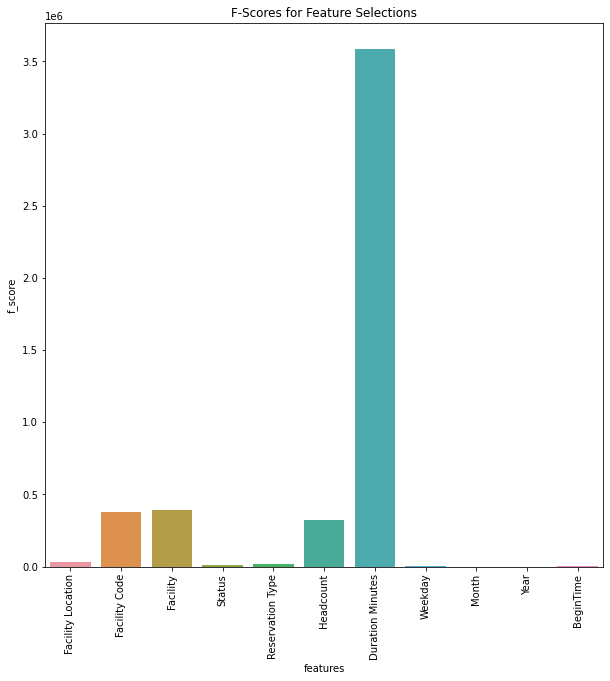

In [7]:
x=df.iloc[:, df.columns != 'Facility Class']  #Independent variable
y=df.iloc[:, df.columns == 'Facility Class']   #Target variable
f_score, p_value = chi2(x, y)

# create a DataFrame of f-scores
df_fscore = pd.DataFrame({'features': x.columns, 'f_score': f_score})

# plot the f-scores using a bar plot
plt.figure(figsize=(10,10))
sns.barplot(x='features', y='f_score', data=df_fscore)
plt.title("F-Scores for Feature Selections")
plt.xticks(rotation=90)

In [8]:
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value)

Facility Location    378961.697268
Facility Code        378961.697268
Facility             378961.697268
Status               378961.697268
Reservation Type     378961.697268
Headcount            378961.697268
Duration Minutes     378961.697268
Weekday              378961.697268
Month                378961.697268
Year                 378961.697268
BeginTime            378961.697268
dtype: float64


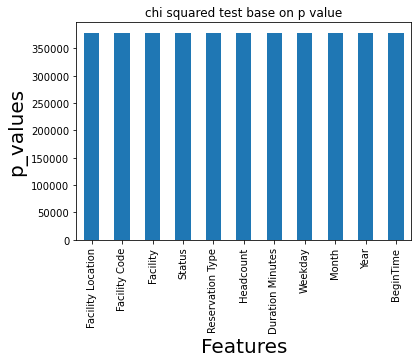

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [10]:
x=df.iloc[:, df.columns != 'Reservation Type']  #Independent variable
y=df.iloc[:, df.columns == 'Reservation Type']   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value)

Facility Code         0.000000e+00
Facility              0.000000e+00
Status                0.000000e+00
Headcount             0.000000e+00
Duration Minutes      0.000000e+00
Weekday               0.000000e+00
Facility Location    4.525064e-207
Facility Class        2.180652e-80
BeginTime             5.223466e-27
Month                 4.201561e-01
Year                  8.238688e-01
dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

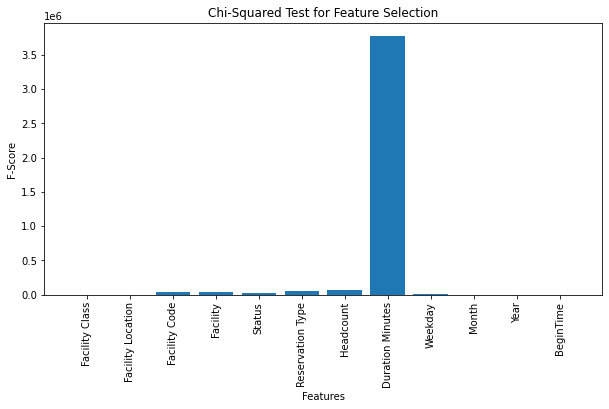

In [11]:
x=df.iloc[:, df.columns != 'Reservation Type']  #Independent variable
y=df.iloc[:, df.columns == 'Reservation Type']   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)

# get the f-scores for all features
f_score, _ = chi2(df, y)

# create a bar chart of all features and their f-scores
plt.figure(figsize=(10,5))
plt.bar(df.columns, f_score)
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.title('Chi-Squared Test for Feature Selection')
plt.xticks(rotation=90)


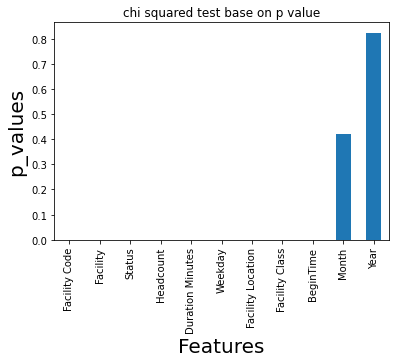

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [13]:
from sklearn.feature_selection import SelectKBest

# for classification, we use these three
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# this function will take in X, y variables 
# with criteria, and return a dataframe
# with most important columns
# based on that criteria
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

In [14]:
New_X = featureSelect_dataframe(x, y, chi2, 4)

New_X

,Facility Code,Facility,Headcount,Duration Minutes
0,0,0,100.000000,210
1,1,1,100.000000,360
2,1,1,36.387374,55
3,1,1,36.387374,55
4,1,1,36.387374,75
...,...,...,...,...
123644,39,39,17.949062,300
123645,22,21,7.000000,55
123646,22,21,6.000000,55
123647,22,21,15.000000,45


In [15]:
New_X = featureSelect_dataframe(x, y, mutual_info_classif, 4)

New_X

C:\Users\rschm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Facility Code,Facility,Headcount,Duration Minutes
0,0,0,100.000000,210
1,1,1,100.000000,360
2,1,1,36.387374,55
3,1,1,36.387374,55
4,1,1,36.387374,75
...,...,...,...,...
123644,39,39,17.949062,300
123645,22,21,7.000000,55
123646,22,21,6.000000,55
123647,22,21,15.000000,45


In [39]:
from sklearn.feature_selection import mutual_info_regression, f_regression
New_X = featureSelect_dataframe(x, y, mutual_info_regression, 4)

New_X

/Users/patrickmoll/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Facility Code,Facility,Headcount,Duration Minutes
0,0,0,100.000000,210.0
1,1,1,100.000000,360.0
2,1,1,36.387374,55.0
3,1,1,36.387374,55.0
4,1,1,36.387374,75.0
...,...,...,...,...
123644,39,39,17.949062,300.0
123645,22,21,7.000000,55.0
123646,22,21,6.000000,55.0
123647,22,21,15.000000,45.0


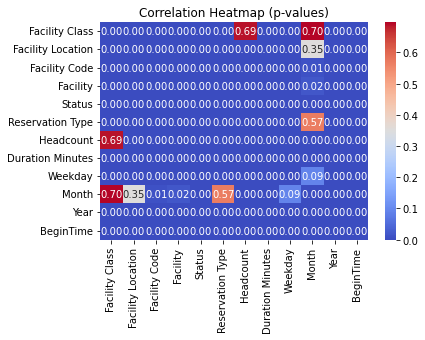

In [16]:
corr_matrix = df.corr()
#p_values = corr_matrix.apply(lambda x: x.apply(lambda y: float("{:.2f}".format(y))))

from scipy.stats import pearsonr

p_values = corr_matrix.copy()

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        pearson_coef, p_value = pearsonr(df[i], df[j])
        p_values.loc[i, j] = p_value
# create a heatmap using seaborn
sns.heatmap(p_values, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Correlation Heatmap (p-values)')
plt.show()

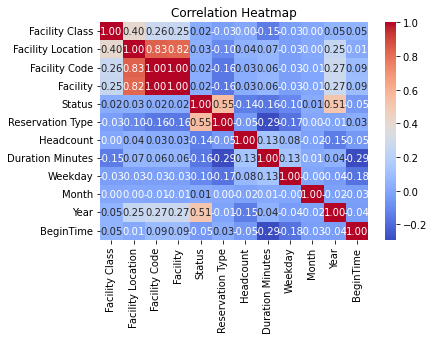

<Figure size 432x288 with 0 Axes>

In [18]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()
plt.savefig("/Users/rschm/Downloads/FeaturesHeatmap.pdf", format="pdf")

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')

# Prepare the data
X = data[['Headcount']]
y = data['Duration Minutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print('R^2 score:', score)

# Make predictions
new_data = pd.DataFrame({'Headcount': [50, 75, 100]})
predictions = model.predict(new_data)
print('Predictions:', predictions)


R^2 score: 0.02517229614304828
Predictions: [141.8273389  148.98334305 156.13934719]


# RFE

In [21]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load the data into a pandas DataFrame
df = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')

# Convert non-numeric columns to numeric using label encoding
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Separate the independent and dependent variables
X = df.drop(['Duration Minutes'], axis=1)
y = df['Duration Minutes']

# Create a linear regression object
lr = LinearRegression()

# Create the RFE object and select the top 5 features
rfe = RFE(lr, n_features_to_select=12, verbose=1)
rfe.fit(X, y)

# Print the selected features
selected_features = X.columns[rfe.support_]
print('Selected features:', selected_features)

# Train a linear regression model using the selected features
X_selected = X[selected_features]
lr.fit(X_selected, y)

# Print the coefficients for each feature
coefficients = pd.DataFrame({'feature': X_selected.columns, 'coefficient': lr.coef_})
coefficients = coefficients.sort_values(by='coefficient', ascending=False)
print('Coefficients:\n', coefficients)


Fitting estimator with 13 features.
Selected features: Index(['Facility Class', 'Facility Location', 'Facility Code', 'Status',
       'Reservation Type', 'Headcount', 'BeginTimeDate', 'EndTimeDate',
       'Weekday', 'Month', 'Year', 'BeginTime'],
      dtype='object')
Coefficients:
               feature  coefficient
4    Reservation Type   112.162612
1   Facility Location    13.301805
10               Year     3.868163
8             Weekday     3.201413
9               Month     1.283905
6       BeginTimeDate     0.488590
5           Headcount     0.207653
7         EndTimeDate    -0.404219
2       Facility Code    -1.550919
0      Facility Class    -6.768100
11          BeginTime   -13.300030
3              Status   -15.409589


# SelectKBest

In [14]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')

# Convert non-numeric columns to numeric using label encoding
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Separate the features (X) and the target variable (y)
X = df.drop('Duration Minutes', axis=1)
y = df['Duration Minutes']

# Select the top 5 features using SelectKBest and chi-squared test
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# Print the feature scores and p-values for all features
scores = selector.scores_
pvalues = selector.pvalues_
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: score={scores[i]:.2f}, p-value={pvalues[i]:.2e}")


Facility Class: score=9192.45, p-value=0.00e+00
Facility Location: score=7591.27, p-value=0.00e+00
Facility Code: score=106721.58, p-value=0.00e+00
Facility: score=111016.68, p-value=0.00e+00
Status: score=29114.73, p-value=0.00e+00
Reservation Type: score=30511.31, p-value=0.00e+00
Headcount: score=2555552.76, p-value=0.00e+00
BeginTimeDate: score=26160431.56, p-value=0.00e+00
EndTimeDate: score=31732448.13, p-value=0.00e+00
Weekday: score=14726.11, p-value=0.00e+00
Month: score=3163.94, p-value=0.00e+00
Year: score=26.88, p-value=1.00e+00
BeginTime: score=56960.74, p-value=0.00e+00


# Lasso Regression

In [14]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load the data from CSV file
df = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')

# Convert non-numeric columns to numeric using label encoding
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Separate the features (X) and target (y)
X = df.drop(['Duration Minutes'], axis=1)
y = df['Duration Minutes']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Lasso regression with alpha=0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

# Print the coefficients of the features
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("Coefficients:\n", coefficients)

# Print the intercept
print("\nIntercept:", lasso.intercept_)


Coefficients:
 Facility Class       -18.291887
Facility Location     20.327531
Facility Code        -31.800556
Facility              -0.000000
Status               -14.521175
Reservation Type      55.489970
Headcount             20.586215
BeginTimeDate        417.670074
EndTimeDate         -415.012049
Weekday                4.915956
Month                  1.618821
Year                  10.768346
BeginTime            -59.653430
dtype: float64

Intercept: 140.09442049672873


C:\Users\rschm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.572e+09, tolerance: 6.260e+05
  model = cd_fast.enet_coordinate_descent(


# Tree-based Methods

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load the data from the CSV file
df = pd.read_csv("/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv")

# Convert non-numeric columns to numeric using label encoding
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Separate the independent and dependent variables
X = df.drop(columns=['Duration Minutes'])
y = df['Duration Minutes']

# Initialize a random forest regressor
rf = RandomForestRegressor()

# Fit the random forest model to the data
rf.fit(X, y)

# Get the feature importances from the trained model
feature_importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Print the top 5 features and their importance scores
print("Top 5 features:")
for i in range(8):
    print(f"{X.columns[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]:.4f}")


Top 5 features:
BeginTime: 0.3478
Facility: 0.1600
Headcount: 0.1041
Reservation Type: 0.0837
Facility Class: 0.0650
Facility Code: 0.0608
Facility Location: 0.0514
Weekday: 0.0389


# Chi-squared Test

In [7]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')

# Convert non-numeric columns to numeric using label encoding
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

# Split the data into features (X) and target (y)
X = data.drop('Duration Minutes', axis=1)  # Replace 'target_column' with the name of your target column
y = data['Duration Minutes']

# Perform the chi-squared test to select the top 5 most important features
best_features = SelectKBest(score_func=chi2, k=5).fit(X, y)

# Get the indices of the top 5 most important features
top_feature_indices = best_features.get_support(indices=True)

# Get the names of the top 5 most important features
top_feature_names = X.columns[top_feature_indices]

print('The top 5 most important features are:', top_feature_names)


The top 5 most important features are: Index(['Facility Code', 'Facility', 'Headcount', 'BeginTimeDate',
       'EndTimeDate'],
      dtype='object')
